In [1]:
# import torch
# import matplotlib.pyplot as plt
# from model import TeacherModel, DPTDepthPredictor
# from cityscapes import Cityscapes
# from torch.utils.data import DataLoader
# import torch
# import os
# import argparse
# checkpoint_path = '/home/avalocal/thesis23/KD/checkpoints/20240909-195823/checkpoint_epoch_50.pth'

# #set seed to reproduce results
# torch.manual_seed(0)
# teacher = TeacherModel()
# student = DPTDepthPredictor()
# pretrained = torch.load(checkpoint_path)
# pretrained['model_state_dict'] = {k.replace('module.', ''): v for k, v in pretrained['model_state_dict'].items()}
# student.load_state_dict(pretrained['model_state_dict'])

# teacher.eval()
# student.eval()





In [2]:
# #get args from train.py
# from train import parse_args

# train_dataset = Cityscapes('/media/avalocal/T7/pardis/pardis/perception_system/datasets/cityscapes', split='train', transform=None, args=None)
# val_dataset = Cityscapes('/media/avalocal/T7/pardis/pardis/perception_system/datasets/cityscapes', split='val', transform=None, args=None)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# teacher.to(device)
# student.to(device)


In [3]:
# import cv2

# IMG_PATH = "/media/avalocal/T7/pardis/pardis/perception_system/datasets/cityscapes/leftImg8bit/train/cologne/cologne_000011_000019_leftImg8bit.png"



In [4]:
# import random
# class RandomCrop:
#     def __init__(self):
#         """
#         Initializes the cropping class for random cropping of 1024x1024 from 1024x2048 images.
#         """
#         self.crop_size = (1024, 1024)

#     def __call__(self, image):
        
#         _, H, W = image.shape
#         assert H == 1024 and W == 2048, f"Expected image size (1024, 2048), but got ({H}, {W})"

#         # Step 1: Randomly select the left coordinate of the crop
#         left = random.randint(0, W - self.crop_size[1])

#         # Step 2: Crop the image and mask
#         image = image[:, :, left:left + self.crop_size[1]]


#         return image

# # Example usage:
# # Initialize the transformer for random cropping
# random_crop = RandomCrop()


In [5]:
# #test instance student model

# import argparse, os , time, wandb, cv2
# from tqdm import tqdm
# import torch
# import torch.nn as nn
# # import torch.nn.functional as F
# import torchvision.transforms.functional as TF
# from detectron2.structures import Boxes, ImageList, Instances, BitMasks

# import torch.optim as optim
# from torch.utils.data import DataLoader
# import pytorch_warmup as warmup
# from model import InstanceStudent, InstanceTeacher
# from cityscapes import Cityscapes
# from loss import MidasLoss, MSGLoss, HDNLoss, scale_and_shift_mae
# from metrics import evaluate_depth, evaluate_instance
# import albumentations as A
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline

# import numpy as np
# import supervision as sv

# from pycocotools import mask as mask_util
# from detectron2.structures import Boxes, BitMasks

# import numpy as np
# import time
# # from model import setup

# # from criterion.criterion_instance import SetCriterion
# # from criterion.matcher import HungarianMatcher

# # from trainInstance import instance_inference
# name_to_num={
#     'person': 0,
#     'rider': 1,
#     'car': 2,
#     'truck': 3,
#     'bus': 4,
#     'train': 5,
#     'motorcycle': 6,
#     'bicycle': 7,
# }

# num_to_name={
#     0: 'person',
#     1: 'rider',
#     2: 'car',
#     3: 'truck',
#     4: 'bus',
#     5: 'train',
#     6: 'motorcycle',
#     7: 'bicycle',
# }


/home/avalocal/miniconda3/envs/KD/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.2) or chardet (5.2.0)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# %matplotlib inline

# # ckpt= "/home/avalocal/thesis23/KD/checkpoints/20241013-004314/checkpoint_epoch_90.pth"
# # ckpt = "/home/avalocal/thesis23/KD/checkpoints/20241014-124244/best_model.pth"
# # ckpt = "/home/avalocal/thesis23/KD/checkpoints/20241016-084024/best_model.pth"#checkpoint_epoch_180.pth" #shows some good results

# # ckpt="/home/avalocal/thesis23/KD/checkpoints/20241020-153916/best_model.pth" #longet training
# ckpt ="/home/avalocal/thesis23/KD/checkpoints/20241022-170111/checkpoint_epoch_20.pth" #continuation

# model = InstanceStudent()


# checkpoint = torch.load(ckpt)
# #image_encoder.trunk.pos_embed"
# checkpoint['model_state_dict'] = {k.replace('module.', ''): v for k, v in checkpoint['model_state_dict'].items()}



# model.load_state_dict(checkpoint['model_state_dict'])

# model.eval()

# # Check total number of parameters
# num_params = sum(p.numel() for p in model.parameters())
# print(f"Total Parameters (including all): {num_params / 1e6:.2f}M")

# # Check trainable parameters
# num_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(f"Trainable Parameters: {num_trainable_params / 1e6:.2f}M")

# print(f"number of Gflopes: {num_params/1e9:.2f}G")

# data_dir = '/media/avalocal/T7/pardis/pardis/perception_system/datasets/cityscapes'

# # # train_dataset = Cityscapes(args.data_dir, split='train', transform=None, args=args, task='instance')
# val_dataset   = Cityscapes(data_dir, split='val', transform=None, args=None, task='instance')
# images, gt_boxes, _, gt_class_ids, nums_objects = val_dataset[0]  #images: 3, 518, 1036 


# print(images.shape)
# print(images.shape, images.max(), images.min()) #torch.Size([3, 518, 1036]) tensor(1.) tensor(0.)


# images = random_crop(images)

# # images*=255
# start = time.time()
# pred_out = model(images.unsqueeze(0))
# print(f"Time: {time.time()-start}")
# print(pred_out["pred_logits"].shape, pred_out["pred_masks"].shape) #torch.Size([1, 9, 9]) torch.Size([1, 9, 4]) torch.Size([1, 9, 28, 28])
# # print(images.shape) #torch.Size([3, 1024, 1024])


# # #show images
# images = images.permute(1, 2, 0).cpu().numpy()

# print(images.shape) #1024, 1024, 3


# plt.imshow(images)
# plt.axis('off')
# plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/avalocal/thesis23/KD/checkpoints/20241022-170111/checkpoint_epoch_20.pth'

In [ ]:
# print(pred_out.keys())
# print(pred_out['pred_logits'].shape) #1, 100, 9
# print(pred_out['pred_masks'].shape)   #1, 100, 256, 256

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# # pred_out['pred_masks'] = TF.interpolate(pred_out['pred_masks'], size=(1024, 1024), mode="bilinear", align_corners=False) #B, 100, 518, 1036
# pred_out['pred_masks'] = TF.resize(pred_out['pred_masks'], (1024, 1024),  interpolation=TF.InterpolationMode.NEAREST)

# mask_pred_results = pred_out['pred_masks'] #1, 100, 1024, 1024
# mask_cls_results = pred_out['pred_logits'] #1, 100, 9

# mask_cls = mask_cls_results[0] #100, 9 #this is logits number are -1000 to +100
# mask_pred = mask_pred_results[0] #100, 1024, 1024 #this is mask logits





# # scores, labels = torch.nn.functional.softmax(mask_cls, dim=1).max(dim=1)
# # mask_pred = mask_pred.sigmoid()

# # pred_masks = mask_pred > 0.6
# # idx = torch.where(labels!=8)[0].cpu()

# # pred_masks = pred_masks[idx]
# # pred_classes = labels[idx]
# # print(pred_masks.shape, pred_classes.shape)

# # pred_boxes = BitMasks(pred_masks).get_bounding_boxes()

# # # pred_class_names = [num_to_name[pred_classes[i]] for i in range(pred_classes.shape[0])]
# # pred_class_names = [num_to_name[pred_classes[i].item()] for i in range(pred_classes.shape[0])]


# # pred_classes


dict_keys(['pred_logits', 'pred_masks'])
torch.Size([1, 100, 9])
torch.Size([1, 100, 1024, 1024])


In [ ]:
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))


# img = images*255
# img = img.astype(np.uint8)
# ax[0].imshow(img)
# ax[0].set_title('Image')
# ax[0].axis('off')


# # pred_class_names = [num_to_name[i] for i in pred_classes.cpu().numpy()]

# pred_detections = sv.Detections(
#                     xyxy=pred_boxes.tensor.cpu().numpy(), #100, 4
#                     mask=pred_masks.cpu().numpy(), #100, 1024, 1024
#                     class_id=pred_classes.cpu().numpy(), #100
#                 )

# box_annotator = sv.BoxAnnotator()
# annotated_frame2 = box_annotator.annotate(scene=img.copy(), detections=pred_detections).astype(np.uint8)


# label_annotator = sv.LabelAnnotator()
# annotated_frame2 = label_annotator.annotate(scene=annotated_frame2, detections=pred_detections, labels=pred_class_names)
# ax[1].imshow(annotated_frame2)
# ax[1].set_title('Prediction')
# ax[1].axis('off')

# mask_annotator = sv.MaskAnnotator()
# annotated_frame2 = mask_annotator.annotate(scene=img.copy(), detections=pred_detections)

# ax[ 2].imshow(annotated_frame2)
# ax[2].set_title('Prediction')
# ax[2].axis('off')
# plt.show()

In [ ]:
# def instance_inference( mask_cls, mask_pred):
        
#         sem_seg_head_num_classes = 8
#         test_topk_per_image = 100
#         device = mask_cls.device
#         num_queries = 100
#         # mask_pred is already processed to have the same shape as original input
#         image_size = mask_pred.shape[-2:]

#         # [Q, K]
#         # scores = F.softmax(mask_cls, dim=-1)[:, :-1]
#         scores = torch.nn.functional.softmax(mask_cls, dim=-1)[:, :-1]
#         labels = torch.arange(sem_seg_head_num_classes, device=device).unsqueeze(0).repeat(num_queries, 1).flatten(0, 1)
#         # scores_per_image, topk_indices = scores.flatten(0, 1).topk(self.num_queries, sorted=False)
#         scores_per_image, topk_indices = scores.flatten(0, 1).topk(test_topk_per_image, sorted=False)
#         labels_per_image = labels[topk_indices]

#         topk_indices = topk_indices // sem_seg_head_num_classes
#         # mask_pred = mask_pred.unsqueeze(1).repeat(1, self.sem_seg_head.num_classes, 1).flatten(0, 1)
#         mask_pred = mask_pred[topk_indices]

#         pred_masks =(mask_pred > 0).float()
#         # pred_boxes = Boxes(torch.zeros(mask_pred.size(0), 4))
#         pred_boxes = BitMasks(mask_pred > 0).get_bounding_boxes()

#         mask_scores_per_image = (mask_pred.sigmoid().flatten(1) * pred_masks.flatten(1)).sum(1) / (pred_masks.flatten(1).sum(1) + 1e-6)
#         scores = scores_per_image * mask_scores_per_image
#         pred_classes = labels_per_image

#         result = Instances(image_size)
#         result.pred_masks = pred_masks#[idx]
#         result.pred_boxes = pred_boxes#[idx] #this slows down
#         result.scores = scores#[idx]
#         result.pred_classes = pred_classes#[idx]


#         return result



# processed_results = []
# for mask_cls_result, mask_pred_result in zip(mask_cls_results, mask_pred_results):

#     instance_result = instance_inference(mask_cls_result, mask_pred_result)

#     processed_results.append(
#         {
#         "boxes": instance_result.pred_boxes.tensor,
#         "classes": instance_result.pred_classes,
#         "masks": instance_result.pred_masks,
#         "scores": instance_result.scores,
#         }
#     )

# preds_bbox = processed_results[0]['boxes'].cpu().numpy() #100, 4
# preds_mask =processed_results[0]['masks'].cpu().numpy().astype(bool) #100, 518, 1036
# preds_class_id = processed_results[0]['classes'].cpu().numpy() #100
# preds_scores = processed_results[0]['scores'].detach().cpu().numpy() #100
# print(processed_results[0]['scores'])
# # idx = np.where(preds_class_id != 8)[0]
# # pred_boxes = preds_bbox[idx]
# # pred_masks = preds_mask[idx]
# # pred_classes= preds_class_id[idx]
# # pred_scores = processed_results[0]['scores'][idx]
# # print(preds_mask.shape, preds_class_id.shape, "this is prediction")
# # pred_class_names = [num_to_name[preds_class_id[i]] for i in range(len(preds_class_id))]
# # print("num of object lenth in preds", len(preds_class_id))
# # pred_class_names = [num_to_name[pred_classes[i]] for i in range(len(pred_classes))]
# # print(pred_boxes.shape, pred_masks.shape, pred_classes.shape, pred_scores.shape)

# idx2= np.where(preds_scores > 0.3)[0]
# pred_boxes = preds_bbox[idx2]
# pred_masks = preds_mask[idx2]
# pred_classes= preds_class_id[idx2]
# pred_scores = preds_scores[idx2]
# print(len(pred_classes))
# pred_class_names = [num_to_name[pred_classes[i]] for i in range(len(pred_classes))]



# pred_boxes, pred_masks, pred_classes, pred_scores, pred_class_names

tensor([0.0568, 0.0000, 0.6357, 0.0582, 0.0622, 0.1000, 0.0554, 0.0728, 0.0853,
        0.0933, 0.2005, 0.0194, 0.0239, 0.0219, 0.0472, 0.0219, 0.0267, 0.0385,
        0.0247, 0.0217, 0.0323, 0.0214, 0.0000, 0.0218, 0.0529, 0.0067, 0.0082,
        0.0123, 0.0101, 0.0224, 0.0191, 0.0065, 0.0174, 0.0123, 0.0100, 0.0074,
        0.0102, 0.0153, 0.0090, 0.0132, 0.0200, 0.0086, 0.0108, 0.0000, 0.0171,
        0.0101, 0.0080, 0.0111, 0.0122, 0.0109, 0.0124, 0.0181, 0.0108, 0.0085,
        0.0101, 0.0183, 0.0096, 0.0088, 0.0065, 0.0087, 0.0186, 0.0129, 0.0187,
        0.0123, 0.0121, 0.0083, 0.0081, 0.0082, 0.0152, 0.0056, 0.0068, 0.0071,
        0.0055, 0.0054, 0.0061, 0.0061, 0.0069, 0.0079, 0.0063, 0.0072, 0.0069,
        0.0052, 0.0059, 0.0057, 0.0055, 0.0000, 0.0053, 0.0055, 0.0056, 0.0058,
        0.0054, 0.0045, 0.0054, 0.0050, 0.0045, 0.0046, 0.0051, 0.0050, 0.0042,
        0.0046], grad_fn=<MulBackward0>)
1


(array([[228., 348., 520., 576.]], dtype=float32),
 array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]]),
 array([2]),
 array([0.635654], dtype=float32),
 ['car'])

NameError: name 'images' is not defined

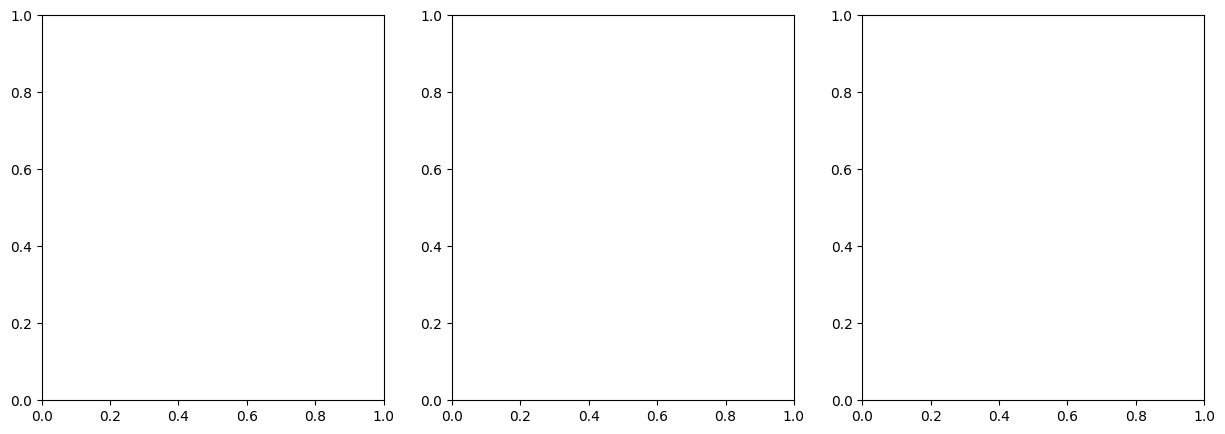

In [ ]:
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))


# img = images*255
# img = img.astype(np.uint8)
# ax[0].imshow(img)
# ax[0].set_title('Image')
# ax[0].axis('off')

# print(img.shape)


# # pred_class_names = [num_to_name[i] for i in pred_classes.cpu().numpy()]

# pred_detections = sv.Detections(
#                     xyxy=pred_boxes, #100, 4
#                     mask=pred_masks, #100, 518, 1036
#                     class_id=pred_classes #100
#                 )

# box_annotator = sv.BoxAnnotator()
# annotated_frame2 = box_annotator.annotate(scene=img.copy(), detections=pred_detections).astype(np.uint8)


# label_annotator = sv.LabelAnnotator()
# annotated_frame2 = label_annotator.annotate(scene=annotated_frame2, detections=pred_detections, labels=pred_class_names)
# ax[1].imshow(annotated_frame2)
# ax[1].set_title('Prediction')
# ax[1].axis('off')

# mask_annotator = sv.MaskAnnotator()
# annotated_frame2 = mask_annotator.annotate(scene=img.copy(), detections=pred_detections)

# ax[ 2].imshow(annotated_frame2)
# ax[2].set_title('Prediction')
# ax[2].axis('off')
# plt.show()

In [ ]:

# ######################################
# ######################################
# ######################################
# ###############STUFF#######################
# ######################################
# ######################################

# import torch
# import torch.nn as nn
# import numpy as np
# import cv2,sys
# import matplotlib.pyplot as plt
# import os
# sam2_folder = "/home/avalocal/thesis23/KD/sam2"
# sys.path.append(sam2_folder)
# from sam2.build_sam import build_sam2
# # from sam2.sam2_image_predictor import SAM2ImagePredictor




# # current_dir = "/home/test/thesis23/KD"


# # DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



# # sam2_checkpoint = os.path.join(current_dir, "sam2/checkpoints/sam2.1_hiera_large.pt")
# # model_cfg= "sam2.1_hiera_l.yaml"
# # sam2_model = build_sam2(model_cfg, sam2_checkpoint, device=DEVICE)
# # sam2_predictor = SAM2ImagePredictor(sam2_model)


# # def teacher_forward(x, prompt):

# #     with torch.no_grad():
# #         sam2_predictor.set_image(x)
# #         masks, scores, logits = sam2_predictor.predict(
# #                             point_coords=None,
# #                             point_labels=None,
# #                             box=prompt,
# #                             multimask_output=False,
# #                         )


# #     return masks, scores, logits

RuntimeError: You're likely running Python from the parent directory of the sam2 repository (i.e. the directory where https://github.com/facebookresearch/sam2 is cloned into). This is not supported since the `sam2` Python package could be shadowed by the repository name (the repository is also named `sam2` and contains the Python package in `sam2/sam2`). Please run Python from another directory (e.g. from the repo dir rather than its parent dir, or from your home directory) after installing SAM 2.

In [ ]:
# import os , sys, json, cv2

# import torch
# import torch.nn as nn
# from model import InstanceTeacher

# img = "/home/test/Desktop/demo/augsburg_000000_000000_leftImg8bit.png"
# img = cv2.imread(img)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# json_file = "/home/test/Desktop/demo/augsburg_000000_000000_gdino_bboxes.json"

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = InstanceTeacher()
# model.to(device)
# model.eval()

# bboxes = []
# with open(json_file, 'r') as f:
#     data = json.load(f)
#     for obj in data['annotations']:
#         bboxes.append(obj['bbox'])

# print(img.shape, len(bboxes))
# mask, _, _ = model(img, bboxes)

# mask = torch.from_numpy(mask).to(device) #N, 1, H, W
# #does mask require grad?
# # print(mask.requires_grad) #False


# mask = mask.squeeze(1)
# mask = mask.sum(0)

# print(mask.shape)  #1024, 2048
# # import matplotlib.pyplot as plt
# # plt.imshow(img)
# # plt.imshow(mask, cmap='jet', alpha=0.5)

# img[mask>0] = 0

# #save image with mask
# #rgb
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# masked_path = "/home/test/Desktop/demo/masked.png"
# cv2.imwrite(masked_path, img)
# print("Masked image saved at", masked_path)



RuntimeError: You're likely running Python from the parent directory of the sam2 repository (i.e. the directory where https://github.com/facebookresearch/sam2 is cloned into). This is not supported since the `sam2` Python package could be shadowed by the repository name (the repository is also named `sam2` and contains the Python package in `sam2/sam2`). Please run Python from another directory (e.g. from the repo dir rather than its parent dir, or from your home directory) after installing SAM 2.

In [ ]:
################################
################################
################################
################################

In [1]:
import numpy as np
np.random.seed(3)

def show_mask(mask, ax, random_color=False, borders = True):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask = mask.astype(np.uint8)
    mask_image =  mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    if borders:
        import cv2
        contours, _ = cv2.findContours(mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
        # Try to smooth contours
        contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
        mask_image = cv2.drawContours(mask_image, contours, -1, (1, 1, 1, 0.5), thickness=2) 
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))    

def show_masks(image, masks, scores, point_coords=None, box_coords=None, input_labels=None, borders=True):
    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        show_mask(mask, plt.gca(), borders=borders)
        if point_coords is not None:
            assert input_labels is not None
            show_points(point_coords, input_labels, plt.gca())
        if box_coords is not None:
            # boxes
            show_box(box_coords, plt.gca())
        if len(scores) > 1:
            plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
        plt.axis('off')
        plt.show()
        

In [2]:
def grid_sampling(mask, num_samples=10):
    """Sample points in a grid pattern from positive regions of the mask"""
    positive_pixels = torch.nonzero(mask, as_tuple=False)
    
    if positive_pixels.size(0) == 0:
        return torch.zeros(num_samples, 2, dtype=torch.int64)
    
    if positive_pixels.size(0) < num_samples:
        # If fewer points than requested, use all and pad with zeros
        selected_points = torch.zeros(num_samples, 2, dtype=torch.int64)
        selected_points[:positive_pixels.size(0)] = positive_pixels
        return selected_points
    
    # Find the bounding box of positive pixels
    min_y, min_x = positive_pixels.min(dim=0)[0]
    max_y, max_x = positive_pixels.max(dim=0)[0]
    
    # Calculate grid dimensions
    grid_h = max(1, int(np.sqrt(num_samples)))
    grid_w = max(1, num_samples // grid_h)
    
    # Create grid cells
    y_step = max(1, (max_y - min_y + 1) // grid_h)
    x_step = max(1, (max_x - min_x + 1) // grid_w)
    
    # Sample from each grid cell
    selected_points = []
    for i in range(grid_h):
        for j in range(grid_w):
            if len(selected_points) >= num_samples:
                break
                
            # Define cell boundaries
            y_min = min_y + i * y_step
            y_max = min_y + (i + 1) * y_step
            x_min = min_x + j * x_step
            x_max = min_x + (j + 1) * x_step
            
            # Find positive pixels in this cell
            cell_mask = (positive_pixels[:, 0] >= y_min) & (positive_pixels[:, 0] < y_max) & \
                        (positive_pixels[:, 1] >= x_min) & (positive_pixels[:, 1] < x_max)
            cell_pixels = positive_pixels[cell_mask]
            
            if cell_pixels.size(0) > 0:
                # Randomly select one point from this cell
                idx = torch.randint(0, cell_pixels.size(0), (1,))
                selected_points.append(cell_pixels[idx])
    
    # Convert to tensor and pad if necessary
    if len(selected_points) > 0:
        points_tensor = torch.cat(selected_points, dim=0)
        result = torch.zeros(num_samples, 2, dtype=torch.int64)
        result[:points_tensor.size(0)] = points_tensor
        return result
    else:
        return torch.zeros(num_samples, 2, dtype=torch.int64)
    

def farthest_point_sampling(mask, num_samples=10):
    """Sample points that are far from each other to better represent the shape"""
    positive_pixels = torch.nonzero(mask, as_tuple=False)
    
    if positive_pixels.size(0) == 0:
        return torch.zeros(num_samples, 2, dtype=torch.int64)
    
    if positive_pixels.size(0) <= num_samples:
        # If fewer points than requested, use all and pad with zeros
        selected_points = torch.zeros(num_samples, 2, dtype=torch.int64)
        selected_points[:positive_pixels.size(0)] = positive_pixels
        return selected_points
    
    # Start with a random point
    selected_indices = [torch.randint(0, positive_pixels.size(0), (1,)).item()]
    selected_points = positive_pixels[selected_indices]
    
    # Iteratively add the farthest point from the currently selected points
    for _ in range(1, min(num_samples, positive_pixels.size(0))):
        # Calculate distances from all points to the selected points
        distances = torch.cdist(positive_pixels.float(), selected_points.float())
        min_distances, _ = torch.min(distances, dim=1)
        
        # Find the point with maximum minimum distance
        farthest_idx = torch.argmax(min_distances).item()
        selected_indices.append(farthest_idx)
        selected_points = positive_pixels[selected_indices]
    
    # Pad if necessary
    result = torch.zeros(num_samples, 2, dtype=torch.int64)
    result[:selected_points.size(0)] = selected_points
    return result
def kmeans_sampling(mask, num_samples=10):
    """Use K-means clustering to find representative points"""
    positive_pixels = torch.nonzero(mask, as_tuple=False)
    
    if positive_pixels.size(0) == 0:
        return torch.zeros(num_samples, 2, dtype=torch.int64)
    
    if positive_pixels.size(0) <= num_samples:
        # If fewer points than requested, use all and pad with zeros
        selected_points = torch.zeros(num_samples, 2, dtype=torch.int64)
        selected_points[:positive_pixels.size(0)] = positive_pixels
        return selected_points
    
    # Use K-means clustering
    from sklearn.cluster import KMeans
    positive_pixels_np = positive_pixels.cpu().numpy()
    kmeans = KMeans(n_clusters=num_samples, random_state=0, n_init=10).fit(positive_pixels_np)
    centers = kmeans.cluster_centers_.astype(int)
    
    # Convert back to tensor
    selected_points = torch.tensor(centers, dtype=torch.int64)
    return selected_points

def boundary_sampling(mask, num_samples=10):
    """Sample points near the boundary of the object"""
    import cv2
    
    # Convert mask to numpy for OpenCV operations
    mask_np = mask.cpu().numpy().astype(np.uint8) * 255
    
    # Find contours (boundaries)
    contours, _ = cv2.findContours(mask_np, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return torch.zeros(num_samples, 2, dtype=torch.int64)
    
    # Combine all contour points
    all_boundary_points = np.concatenate([contour.squeeze(1) for contour in contours], axis=0)
    
    if len(all_boundary_points) == 0:
        return torch.zeros(num_samples, 2, dtype=torch.int64)
    
    # Swap x, y to match your y, x format
    all_boundary_points = all_boundary_points[:, [1, 0]]
    
    if len(all_boundary_points) <= num_samples:
        # Pad if necessary
        result = torch.zeros(num_samples, 2, dtype=torch.int64)
        result[:len(all_boundary_points)] = torch.tensor(all_boundary_points, dtype=torch.int64)
        return result
    
    # Subsample evenly along the boundary
    indices = np.linspace(0, len(all_boundary_points) - 1, num_samples, dtype=int)
    selected_points = all_boundary_points[indices]
    
    return torch.tensor(selected_points, dtype=torch.int64)

def hybrid_sampling(mask, num_samples=10):
    """Combine multiple sampling strategies"""
    # Allocate points to different strategies
    boundary_count = 5 #num_samples // 3  # 1/3 for boundary
    center_count =  5 #num_samples // 3    # 1/3 for center/representative
    grid_count = 5 # num_samples - boundary_count - center_count  # Remainder for grid
    
    # Get boundary points
    boundary_points = boundary_sampling(mask, boundary_count)
    
    # Get center/representative points (using K-means)
    center_points = kmeans_sampling(mask, center_count)
    
    # Get grid points
    grid_points = grid_sampling(mask, grid_count)
    
    # Combine all points
    # all_points = torch.cat([boundary_points, center_points, grid_points], dim=0)
    # all_points = torch.cat([ center_points, grid_points], dim=0)
    # all_points = torch.cat([ center_points], dim=0) #50
    # all_points = torch.cat([grid_points], dim=0) #36
    # all_points = torch.cat([boundary_points], dim=0)  #43
    all_points = torch.cat([boundary_points, center_points], dim=0)  #50

    
    return all_points

def shape_aware_sampling(mask, num_samples=10):
    """Sample more points in complex regions using distance transform"""
    import cv2
    import scipy.ndimage as ndimage
    
    # Convert mask to numpy
    mask_np = mask.cpu().numpy().astype(np.uint8)
    
    if np.sum(mask_np) == 0:
        return torch.zeros(num_samples, 2, dtype=torch.int64)
    
    # Calculate distance transform
    dist_transform = ndimage.distance_transform_edt(mask_np)
    
    # Invert and normalize to prioritize boundary regions
    complexity_map = 1.0 - (dist_transform / (dist_transform.max() + 1e-10))
    
    # Use complexity as a probability map for sampling
    flat_indices = np.random.choice(
        mask_np.size, 
        size=min(num_samples, np.sum(mask_np)), 
        replace=False, 
        p=complexity_map.flatten() / (complexity_map.sum() + 1e-10)
    )
    
    # Convert flat indices to 2D coordinates
    y_indices, x_indices = np.unravel_index(flat_indices, mask_np.shape)
    selected_points = np.column_stack([y_indices, x_indices])
    
    # Pad if necessary
    result = torch.zeros(num_samples, 2, dtype=torch.int64)
    result[:len(selected_points)] = torch.tensor(selected_points, dtype=torch.int64)
    return result

odict_keys(['clip.logit_scale', 'clip.text_model.embeddings.token_embedding.weight', 'clip.text_model.embeddings.position_embedding.weight', 'clip.text_model.encoder.layers.0.self_attn.k_proj.weight', 'clip.text_model.encoder.layers.0.self_attn.k_proj.bias', 'clip.text_model.encoder.layers.0.self_attn.v_proj.weight', 'clip.text_model.encoder.layers.0.self_attn.v_proj.bias', 'clip.text_model.encoder.layers.0.self_attn.q_proj.weight', 'clip.text_model.encoder.layers.0.self_attn.q_proj.bias', 'clip.text_model.encoder.layers.0.self_attn.out_proj.weight', 'clip.text_model.encoder.layers.0.self_attn.out_proj.bias', 'clip.text_model.encoder.layers.0.layer_norm1.weight', 'clip.text_model.encoder.layers.0.layer_norm1.bias', 'clip.text_model.encoder.layers.0.mlp.fc1.weight', 'clip.text_model.encoder.layers.0.mlp.fc1.bias', 'clip.text_model.encoder.layers.0.mlp.fc2.weight', 'clip.text_model.encoder.layers.0.mlp.fc2.bias', 'clip.text_model.encoder.layers.0.layer_norm2.weight', 'clip.text_model.enc

/home/avalocal/miniconda3/envs/KD/lib/python3.10/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


class name is sidewalk max min of threshold tensor(0.6661, grad_fn=<MaxBackward1>) tensor(8.8834e-05, grad_fn=<MinBackward1>)


/home/avalocal/miniconda3/envs/KD/lib/python3.10/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


class name is building max min of threshold tensor(0.8713, grad_fn=<MaxBackward1>) tensor(4.4069e-05, grad_fn=<MinBackward1>)


/home/avalocal/miniconda3/envs/KD/lib/python3.10/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


class name is wall max min of threshold tensor(0.9103, grad_fn=<MaxBackward1>) tensor(2.3645e-05, grad_fn=<MinBackward1>)


/home/avalocal/miniconda3/envs/KD/lib/python3.10/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


class name is fence max min of threshold tensor(0.1388, grad_fn=<MaxBackward1>) tensor(1.1162e-05, grad_fn=<MinBackward1>)
class name is pole max min of threshold tensor(0.4959, grad_fn=<MaxBackward1>) tensor(3.8327e-05, grad_fn=<MinBackward1>)


/home/avalocal/miniconda3/envs/KD/lib/python3.10/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


class name is traffic light max min of threshold tensor(0.0042, grad_fn=<MaxBackward1>) tensor(8.9551e-06, grad_fn=<MinBackward1>)
class name is traffic sign max min of threshold tensor(0.0243, grad_fn=<MaxBackward1>) tensor(4.5791e-05, grad_fn=<MinBackward1>)
class name is vegetation max min of threshold tensor(0.9914, grad_fn=<MaxBackward1>) tensor(4.6451e-05, grad_fn=<MinBackward1>)


/home/avalocal/miniconda3/envs/KD/lib/python3.10/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


class name is terrain max min of threshold tensor(0.1078, grad_fn=<MaxBackward1>) tensor(0.0002, grad_fn=<MinBackward1>)
class name is sky max min of threshold tensor(0.9214, grad_fn=<MaxBackward1>) tensor(1.6488e-05, grad_fn=<MinBackward1>)


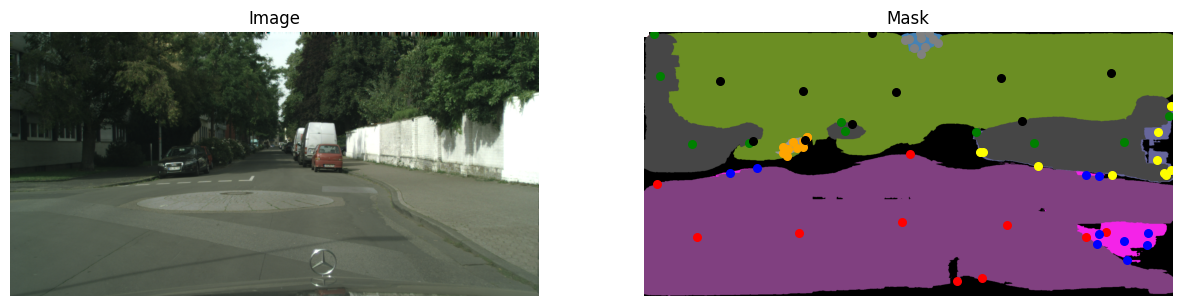

In [3]:
from transformers import AutoProcessor, CLIPSegForImageSegmentation
import numpy as np, torch, random
from PIL import Image

import requests
import matplotlib.pyplot as plt

processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

#ckpt = "/home/avalocal/thesis23/KD/sam2/checkpoints/clipseg_finetuned_semantic_cityscapes_1e-4.pth"
# ckpt="/home/avalocal/thesis23/KD/sam2/checkpoints/clipseg_finetuned_semantic_cityscapes_1e-5.pth"
ckpt="/home/avalocal/thesis23/KD/semantic_seg/clipseg_finetuned/clipseg_finetuned_semantic_cityscapes_1e-05.pth"
dic = torch.load(ckpt)
print(dic.keys())
model.load_state_dict(dic)

img_path = "/media/avalocal/T7/pardis/pardis/perception_system/datasets/cityscapes_complete/leftImg8bit/train/krefeld/krefeld_000000_000108_leftImg8bit.png"

image = Image.open(img_path)

#cut lower part of the image and resize to 1024, 2048
image = image.crop((0, 0, 2048, 970))
image = image.resize((2048, 1024)) 
image = np.array(image)
print(image.shape) #1024, 2048, 3
#stuff classes 11-class
dic = {0: 'road', 1: 'sidewalk', 2: 'building', 3: 'wall', 4: 'fence', 5: 'pole', 6: 'traffic light', 7: 'traffic sign', 8: 'vegetation', 9: 'terrain', 10: 'sky'}
num_to_color = {
    0: [128, 64, 128], 1: [244, 35, 232], 2: [70, 70, 70],  3: [102, 102, 156], 4: [190, 153, 153],  5: [153, 153, 153],
    6: [250, 170, 30],  7: [220, 220, 0], 8: [107, 142, 35], 9: [152, 251, 152], 10: [70, 130, 180]
}
class_thresholds = {
    0: 0.3,  # road - might need lower threshold
    1: 0.3,  # sidewalk
    2: 0.3,   # building
    3: 0.3,   # wall
    4: 0.3,   # fence
    5: 0.3,   # pole
    6: 0.3,   # traffic light
    7: 0.3,   # traffic sign
    8: 0.3,   # vegetation
    9: 0.3,   # terrain
    10: 0.3   # sky
}

stuff_mask = torch.zeros(len(dic), 1024, 2048)
assigned_pixels = torch.zeros(1024, 2048, dtype=torch.bool)

#set seed
torch.manual_seed(0)
sampling = 10 # more than 15 make it less accurate!!!
# threshold = 0.50
points =torch.zeros(len(dic), sampling, 2)


for i in range(len(dic)):
    prompt = f"{dic[i]}"
    #print(image.max(), image.min())
    inputs = processor(text=prompt, images=image, padding=True, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    logits = logits.unsqueeze(0)
    logits = torch.nn.functional.interpolate(logits, size=(1024, 2048), mode="bilinear", align_corners=False)
    logits = logits.squeeze(0)
    logits = logits.sigmoid()

    # Mask creation
    print("class name is", dic[i], "max min of threshold", logits.max(), logits.min())
    mask = logits > class_thresholds[i]

    # Avoid assigning already assigned pixels
    mask = mask & ~assigned_pixels

    # Update stuff mask and assigned pixel
    stuff_mask[i] = mask
    assigned_pixels = assigned_pixels | mask

    # Sampling
    points[i] = hybrid_sampling(stuff_mask[i], num_samples=sampling)
     
'''for i in range(len(dic)):

    idx_points = torch.nonzero(stuff_mask[i], as_tuple=False)
    # Randomly select 10 points
    if idx_points.size(0) >= sampling:
        selected_indices = random.sample(range(idx_points.size(0)), sampling)
        selected_points = idx_points[selected_indices]
    else:
        # If less than 10 valid points, pad with zeros
        selected_points = torch.zeros(sampling, 2, dtype=torch.int64)
        selected_points[:idx_points.size(0)] = idx_points

    # print(selected_points.shape, "shape of selected points")  # 10, 2
    points[i] = selected_points
    # stuff_mask[i] = logits'''

# print(stuff_mask.shape) #6, 1024, 2048
# print(points.shape)     #6, 10, 2

def colorize_mask(mask):
    mask = mask.detach().cpu().numpy()
    color_mask = np.zeros((mask.shape[1], mask.shape[2], 3))
    for i in range(mask.shape[0]):
        color = num_to_color[i]
        color_mask[mask[i] == 1] = color
    return color_mask

color_mask = colorize_mask(stuff_mask) #1024, 2048, 3
color_mask = color_mask.astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title('Image')
ax[0].axis('off')
ax[1].imshow(color_mask)
ax[1].set_title('Mask')
ax[1].axis('off')

colors=['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'black', 'white', 'grey']
for i in range(len(points)):
    for point in points[i]:
        ax[1].scatter(point[1], point[0], s=30, c=colors[i], marker='o')
plt.show()



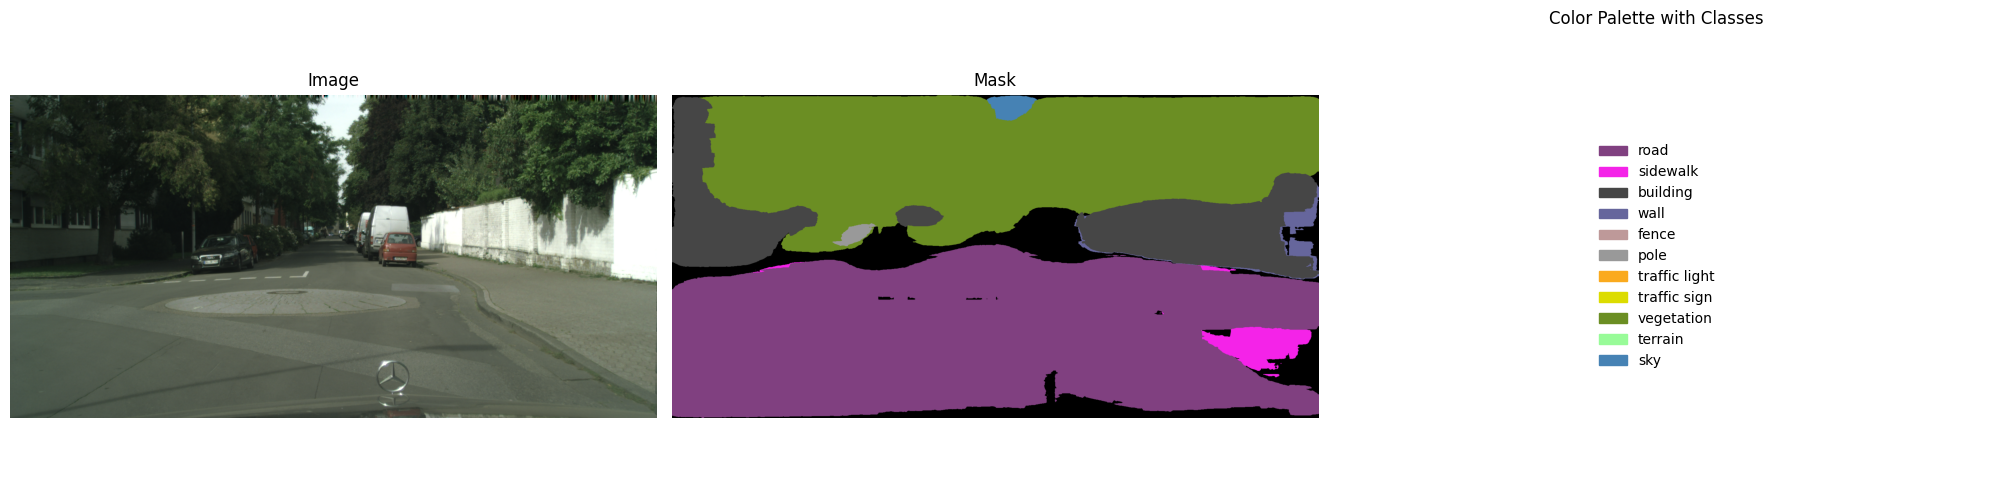

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a color legend using the num_to_color dictionary
def plot_color_legend(num_to_color, dic):
    legend_handles = []
    for i, color in num_to_color.items():
        patch = mpatches.Patch(color=np.array(color) / 255, label=dic[i])
        legend_handles.append(patch)
    
    return legend_handles

# Plot the image, mask, and color legend
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Original image
ax[0].imshow(image)
ax[0].set_title('Image')
ax[0].axis('off')

# Mask
ax[1].imshow(color_mask)
ax[1].set_title('Mask')
ax[1].axis('off')

# Color legend
ax[2].axis('off')
ax[2].legend(handles=plot_color_legend(num_to_color, dic), loc='center', frameon=False)
ax[2].set_title('Color Palette with Classes')

plt.tight_layout()
plt.show()




In [3]:
import sys, os
#sys.path.append("/home/test/thesis23/KD/sam2")
import torch
import torch.nn as nn
# Update your imports to use the full package path
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

# First, reset Hydra's global state
from hydra.core.global_hydra import GlobalHydra
GlobalHydra.instance().clear()

from hydra import initialize

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sam2_checkpoint = "/home/avalocal/thesis23/KD/sam2/checkpoints/sam2.1_hiera_large.pt"
model_cfg = "sam2.1_hiera_l.yaml"

# Replace this path with the actual path to your config directory
config_dir = "sam2/sam2/configs/sam2.1"
with initialize(version_base=None, config_path=config_dir):
    sam2_model = build_sam2(model_cfg, sam2_checkpoint, device=device)

predictor = SAM2ImagePredictor(sam2_model)



HydraException: config_path in initialize() must be relative

In [6]:
predictor.set_image(image)

genral_mask = torch.zeros(len(dic), 1024, 2048)
print(genral_mask.shape, points.shape)

for i in range(len(dic)):
    
    
    # prompt = f"{dic[i]}"
    points_ = points[i]
    #change x, y to y, x
    points_ = points_[:, [1, 0]]

    masks, scores, _ = predictor.predict(
        point_coords=points_,
        point_labels=[1]*len(points_),
        multimask_output=False,
    )
    print(scores, "this are scores")
    print(dic[i])

    masks = torch.from_numpy(masks).to(device)
    print(masks.shape)

    genral_mask[i] = masks
    
# print(scores)

# #show general mask with colors in dic
color_mask = colorize_mask(genral_mask)
color_mask = color_mask.astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title('Image')
ax[0].axis('off')
ax[1].imshow(color_mask)
ax[1].set_title('Mask')
ax[1].axis('off')
#add points on the mask


NameError: name 'predictor' is not defined

(1024, 2048, 3) (1024, 2048, 3)


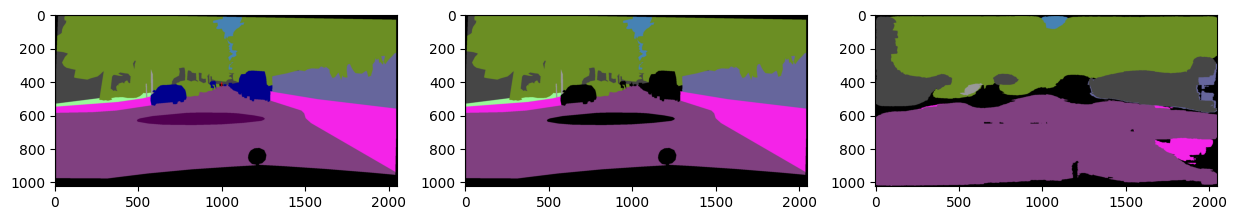

Class 0: IoU = 0.6543
Class 1: IoU = 0.1174
Class 2: IoU = 0.2343
Class 3: IoU = 0.0779
Class 4: IoU = nan
Class 5: IoU = 0.1613
Class 6: IoU = nan
Class 7: IoU = nan
Class 8: IoU = 0.8583
Class 9: IoU = 0.0000
Class 10: IoU = 0.3887
0.31150999748743835


In [7]:
#miou score
import cv2
groundTruth = "/media/avalocal/T7/pardis/pardis/perception_system/datasets/cityscapes_complete/gtFine/train/krefeld/krefeld_000000_000108_gtFine_color.png"
pred = color_mask #1024, 2048, 3

gt = cv2.imread(groundTruth)
gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB) #1024, 2048, 3
gt = cv2.resize(gt, (2048, 1024))


print(gt.shape, pred.shape) #1024, 2048, 3 | 1024, 2048, 3
output = np.zeros_like(pred)
#keep only classes in dic and anything else black
for i in range(len(dic)):
    color = num_to_color[i]
    class_mask = np.all(gt == color, axis=-1)

    # Apply the mask to the output, replacing only where the class matches
    output[class_mask] = color

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(gt)
ax[1].imshow(output)
ax[2].imshow(color_mask)
plt.show()
#compute miou
def compute_miou(pred, gt):
    num_classes = len(dic)
    
    ious = []
    for cls in range(num_classes):
        # Convert class indices to corresponding colors if necessary
        color = num_to_color.get(cls)#, (0, 0, 0))  # Default to black for the 'other' class
        
        # Create binary masks for the current class
        pred_mask = np.all(pred == color, axis=-1)
        gt_mask = np.all(gt == color, axis=-1)
        
        # Compute intersection and union
        intersection = np.logical_and(pred_mask, gt_mask).sum()
        union = np.logical_or(pred_mask, gt_mask).sum()
        # print(intersection, union)
        
        if union <=1e-9:
            # Skip IoU computation if the union is zero (class not present in both)
            ious.append(np.nan)
        else:
            ious.append(intersection / union)
        
        print(f"Class {cls}: IoU = {ious[-1]:.4f}") 
    
    # Compute mean IoU, ignoring NaN entries
    miou = np.nanmean(ious)
    return miou
    
    
    

miou_ = compute_miou(pred, output)
# miou_ = compute_miou(pred, pred)
print(miou_)

#class 0 is road 
#class 1 is sidewalk 
#class 2 is building
#class 3 is wall
#class 4 is fence
#class 5 is pole
#class 6 is traffic light
#class 7 is traffic sign
#class 8 is vegetation
#class 9 is terrain
#class 10 is sky






torch.Size([3, 1024, 2048]) torch.Size([1024, 2048])
(1024, 2048)


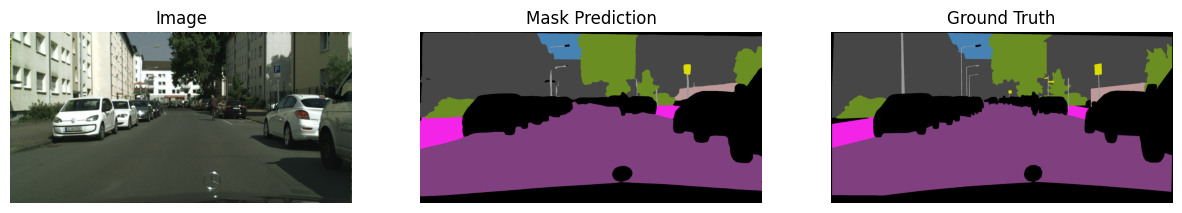

In [79]:
import matplotlib.pyplot as plt
import cv2, torch
from dinoV2_dpt_models.semseg.dpt import DPT
import numpy as np

val_dataset = Cityscapes(root_dir="/media/avalocal/T7/pardis/pardis/perception_system/datasets/cityscapes",split='val')

img, label = val_dataset[1]
print(img.shape, label.shape) #3, 1024, 2048 | 1024, 2048  
#resize to 798
img_orig = img.permute(1, 2, 0).numpy()/255.
img = cv2.resize(img.permute(1, 2, 0).numpy(), (798, 798))
img = torch.from_numpy(img).permute(2, 0, 1).float() / 255.0



# img = "/media/avalocal/T7/pardis/pardis/perception_system/datasets/cityscapes/leftImg8bit/val/lindau/lindau_000002_000019_leftImg8bit.png"
# img = cv2.imread(img)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# #resize to 798
# img_orig = img
# img = cv2.resize(img, (798, 798))
# img = torch.from_numpy(img).permute(2, 0, 1).float() / 255.0

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
student_model = DPT(
    encoder_size='base', 
    nclass=12,
    features=256, 
    out_channels=[96, 192, 384, 768], 
    use_bn=False,
)

ckpt = "/home/avalocal/thesis23/KD/sam2/checkpoints/semantic_student_finetuned_expert_no_pretrained_12_27_2024_21_53_max_decay_steps44.pth"
checkpoint = torch.load(ckpt, map_location='cpu')['model_state_dict']
new_checkpoint = {}
for key in checkpoint.keys():
    new_key = key.replace('module.', '')
    new_checkpoint[new_key] = checkpoint[key]


student_model.load_state_dict(new_checkpoint, strict=True)  
student_model.to(device)
student_model.eval()
    
with torch.no_grad():
    logits = student_model(img.unsqueeze(0).to(device))
    logits = torch.nn.functional.interpolate(logits, size=(1024, 2048), mode="bilinear", align_corners=False)
    logits = logits[0].argmax(0).cpu().numpy()
    print(logits.shape) # 1024, 2048

num_to_color = { 0: [128, 64, 128], 1: [244, 35, 232], 2: [70, 70, 70],
    3: [102, 102, 156], 4: [190, 153, 153], 5: [153, 153, 153],
    6: [250, 170, 30], 7: [220, 220, 0], 8: [107, 142, 35], 9: [152, 251, 152],
    10: [70, 130, 180]
}

color_mask = np.zeros((1024, 2048, 3), dtype=np.uint8)
for i, color in num_to_color.items():
    color_mask[logits == i] = color

label_GT_color = np.zeros((1024, 2048, 3), dtype=np.uint8)
for i, color in num_to_color.items():
    color = np.array(color)
    mask = (label == i)
    label_GT_color[mask] = color


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_orig)
ax[0].set_title('Image')
ax[0].axis('off')
ax[1].imshow(color_mask)
ax[1].set_title('Mask Prediction')
ax[1].axis('off')
ax[2].imshow(label_GT_color)
ax[2].set_title('Ground Truth')
ax[2].axis('off')
plt.show()

